# Partially Supervised Feature Selection with Regularized Linear Models


## Feature selection methods overview

This item is based con the first paper.

**Goals of feature selection**

Scenarios related to few tens of samples but thousands dimensions: microarray data, 

1. To avoid overfiting and improve model performance, prediction performance in the case of supervised classification and better cluster detection in unsupervised scenarios.

2. To provide more efficient models

3. To gain a deeper insight into the underlying processes that generated the data. The excess of dimensionality difficult the understanding.

The problem is related to find the optimal model parameters for the optimal feature subset. So, the model parameters becomes dependent of the features selected and need to be computed more or less coupled with the guessing of model parameters.

From less (zero) to more coupled computation, we have three strategies:

1. Filter techniques. Two step process, first the filtering, then the training of the model. Take into account only the properties of the data and in some cases a certain amount of prior knowledge. Therefore it's independent of the classification method. In its most simplest form ignores dependences on the data (univariate).

    Examples: Euclidean distance, i-test Information gain, Markov blanket filter

2. Wrapper methods. Once selected a candidate subset of features, the classification model is evaluated by training and testing the model. This is iterated over a ensemble of candidate subsets, and the model (with his feature subsets) selected is the model with the best accuracy. 
    
    It's very important to construct a good searching algorithm of subsets, in order to reduce the number of sets to model with. This methods are dependent of the classifier, model feature dependencies and have the risk to be bind to a local optima. With randomizing techniques this problem is bypassed to some extent. 
    
    Examples: Sequential forward selection (SFS) , Sequential backward elimination, Simulated annealing, Randomized hill climbing, Genetic algorithms.

3. Embedded methods. The search of the optimal subset of features is built into the classifier. Have the advantage that they include the interaction with the classification model, while at the same time being far less computationally intensive than wrapper methods.

    Examples: Decision trees Weighted naive Bayes, Feature selection using the weight vector of SVM, AROM
    
### AROM methods

The acronym derives from *Approximation of Minimization zeRO-norm*

The problem is obtain a linear predictor $h$, minimizing the number of independent variables (features) without loss of accuracy:

$$h(\mathbf{x}) = sign(\mathbf{w} \cdot \mathbf{x} + b)$$

for $n$ samples $x_i \in \mathbb{R}^n$ and $m$ labels $y_i \in \{\pm1\}$.

The accuracy constraint requires correspondence of sign 

$sign(y_i) \cdot sign(h_i) > 0$ or in other form $y_i \cdot h_i = 1$

or less restrictive, enabling $\mathbf{w}$ to scale freely $y_i \cdot h_i \ge 1$

so 

$$y_i(\mathbf{w} \cdot \mathbf{x} + b) \ge 1$$

The minimization is done with a norm defined over the vectorial space of $\mathbf{w}$. One approach is to minimize the zero-norm, that is, the number of components of the vector (number of non null $w_i$). But it's know to be a NP-Hard problem.

It's more adequate compute over a 1-norm or a 2-norm. In the second paper, the author deduce a suitable form for the function that could be minimized, taken into account the former constraint:

$$\displaystyle\sum_{j=1}^n ln(|w_j| + \epsilon)$$

The term $\epsilon$ is included to protect from zero values inside logarithm.

AROM methods are therefore feature selection embedded methods.

**l1-AROM** and **l2-AROM** (in this case by means of a 2-norm minimization) algorithms optimize this algorithm by iterative rescaling of inputs and doing a smooth feature selection since the weight coefficients along some dimensions progressively drop below the machine precision while other dimensions become more significant.

### AROM semi-supervised

Third and Fourth papers explore a improvement of these previous described methods.

**Goal**

Classification of microarray data: few tens of samples against several thousand dimensions (genes).

**Key differential strategy**

Extend AROM methods by means of partial supervision on the dimensions of a feature selection procedure. The technique proposes to use of prior knowledge to guide feature selection, but flexible enough to let the final selection depart from it if necessary to optimize the classification objective.

The preferential features are previously selected from similar datasets in large microarray databases because it's known that different sub-samples of patients lead to very similar sets of biomarkers, as expected if we are aware that the biological process explaining the outcome is common among different patients.

This datasets are called source datasets and we expect that the prediction for a similar feature vector is the same than the prediction for this vector in our dataset (the target).

*In third paper prior knowledge is incorporated by biological information*

So, if we have some knowledge on the relative importance of each feature (either from actual prior knowledge or from a related dataset), the supervised AROM objective can be modified by adding a prior relevance vector $\beta = [\beta_1,...,\beta_n]$  defined over the $n$ dimensions and where $\beta_j >0$ is the prior relevance of the $j$ feature.

So in this case, the function to minimize in the case of 1-norm is:

$$\displaystyle\sum_{j=1}^n \frac{1}{\beta_j} ln(|w_j| + \epsilon)$$

In the case of L2-NORM, is necessary to minimize:

$$ min_{\vec{w}} \|\vec{w}\|_{2}^{2} $$

To do so, the authors Helleputte & Dupont define an iterative method over $k$:

1. At step $k = 0$, initialize $\vec{w_0} = \vec{w_0} = \vec{\beta}$

2. Iterate until convergence:

    a. Calculate $min_{\vec{w}} \|\vec{w}\|_{2}^{2}$  constrained to  $y_i (\vec{w} (\vec{x_i} * \vec{w_k} ) + b) \ge 1$

    b. With this $\vec{w}$ set the following iteration vector: $\vec{w_k} * \vec{w} * \vec{\beta}  \rightarrow \vec{w}_{k+1}$

## L2-AROM and PS-L2-AROM
Describe how the provided implementation of L2-AROM works. See [2, 3, 4] for specific details. Next, implement a variable ranking approach based on the PS-L2-AROM method, as described in [4], using the provided implementation of L2-AROM.

You should introduce the possibility in the previous implementation to specify the initial value of of the scaling vector z. By default this vector should be equal to a vector with all components equal to one. By increasing or reducing these values, one should be able to favor, or make more difficult the selection of specific features. This will lead to the method PS-L2-AROM, in which some sort of prior-knowledge about the importance of each feature can be considered.

### Implementation

The implementation provided is based in iterative algorithm showed at the end of the previous section but without introduction of previous knowledge. We change the notation, the iterative weight/coefficients vector is $\vec{z}_k$ replacing $\vec{w}_k$

1. At step $k = 0$, initialize $$\vec{z}_0 = (1, ...,1) $$

2. Iterate until convergence:

    a. Calculate $$min_{\vec{w}} \|\vec{w}\|_{2}^{2}\;constrained\;to: y_i (\vec{w}(\vec{x_i} * \vec{z_k} ) + b) \ge 1 $$

    b. With this $\vec{w}$ set the following iteration vector: $$\vec{z_k} * \vec{w} \rightarrow \vec{z}_{k+1}$$

The step 2.a is implemented by a linear fit over a *SVM* algorithm.

We see it commenting over the code:

```python
    
    def variable_ranking(X, Y, C = 1, threshold = 1e-10):
    """
    """
    # X is the samples*features matrix and Y the labels of each sample
    final_X = X.copy()
    # Ititialization of z (equation (6))
    z = np.ones(X.shape[1])

    length = z.shape[0]

    # Array that stores the elimination order, being the higher number the first attribute 
    # that is eliminated and 1 the last one
    elimination_order = np.zeros(length, dtype = int)
    
    original_feature_indices = np.arange(0, length, dtype = int)
    # This is the definition of the linear classifier for the equation (7)
    clf = SVC(kernel = "linear", C = C, random_state = 0)

    iter_without_dropping = 0
    n_removed_features = 0
    
    # The iteration stops if there are 20 iterations not able to drop new features, and 
    # if the remaining number of features are less than 10 
    while iter_without_dropping < 20 and length > 10:

        # Fit the SVC and obtain the solution w = clf.coef_[0]. 
        # This is the resolution of equation (7)
        clf.fit(final_X * np.outer(np.ones(X.shape[ 0 ]), z), Y)
        # Compute the new z rescaling the coeficients, equation (8).
        z *= np.abs(clf.coef_[0]) 
        n_features_to_drop = np.sum(z < threshold)
        if n_features_to_drop == 0:
            iter_without_dropping += 1
        else:
            iter_without_dropping = 0
            # We filter z retaining the components with values over the threshold
            # Then we store in remove_order the positions of these components according 
            # to these values, the index of the smallest, the first. 
            remove_order = np.argsort(z[ z < threshold ])
            # We recompute elimination order, increasing only the indexes
            # of the features removed and
            # in the order provided by remove order, 
            # so the first removed feature (that one with smallest z)
            # has a new index of 0 (in this case no modification), 
            # the following and index of one, and so on 
            # The values assigned are refered to a initial variable 
            # n_removed_features = 0 that is incremented
            # in each step by the number of removed features in order to have unique indexes.
            elimination_order[ original_feature_indices[ z < threshold ][ remove_order ] ] = \
                np.arange(0, n_features_to_drop) + n_removed_features + 1
            n_removed_features += n_features_to_drop
            length -= n_features_to_drop
        
            # Delete from X, z and original_features the selected ones
            final_X = final_X[ :, z >= threshold ]
            original_feature_indices = original_feature_indices[ z >= threshold ]
            z = z[ z >= threshold ]

    # Removing of all remaining features (features not processed
    if length > 0:
            remove_order = np.argsort(z)
            elimination_order[ original_feature_indices[ remove_order ] ] = \
                np.arange(0, length) + n_removed_features + 1

            # The array is reversed so the more relevant features, 
            # the last ones to remove, are in the first places
            # in order to ease the feature selection.
            return np.argsort(-elimination_order)

```

To introduce previous knowledge to obtain the partially supervised extension of L2-AROM algorithm it's necessary to introduce a weight vector $\beta$ according to the modified equations (6) to (8)

1. At step $k = 0$, initialize $$\vec{z}_0 = \vec{\beta}$$

2. Iterate until convergence:

    a. Calculate $$min_{\vec{w}} \|\vec{w}\|_{2}^{2}\;constrained\;to: y_i (\vec{w}(\vec{x_i} * \vec{z_k} ) + b) \ge 1 $$

    b. With this $\vec{w}$ set the following iteration vector: $$\vec{z_k} * \vec{w} * \vec{\beta} \rightarrow \vec{z}_{k+1}$$



The modification of the previous algorithm is included in point *1.3.4 Main process* in the first method **ps_l2_arom_feature_ranking**.

## Experiments of paper 4

Reproduce the experiments reported in [4]. For this, you can make use of the associated datasets which you will find in the data folder associated to this project proposal. Note that given a particular selected subset of variables, the classifier employed should be a soft-margin linear SVM with C = 1.


We are implemented all the experiments. We are going to summarize here the interesting things in the scope of the procedure and discrepancies with the results that the authors show in the paper.

**Preprocessing of datasets**

We have three datasets from three experiments: Chandran, Singh and Welsh. All three used the same Affymetrix microarray technology but one of them a different version (Welsh), so the features do not coincide in position or often in name. There are even subtle differences between the names of the features of the two matching datasets.

The first task was to relate the features. We were not able to obtain references on the web, but a visual inspection allowed us to determine the necessary transformations between their names.

For this we implemented an intersection procedure. In the first step we modified the names of the columns of the three datasets applying a simple process that made the spurious differences disappear.

With the columns thus homogenized, we proceeded to the intersection so that we were left with new versions of the three datasets. These versions contain the same variable in each column. So in index 4, for example, the 3 datasets contain the data of feature *102_f_at*.

The three original datasets were reduced to $12600$ feature columns plus the labels column *Y*, from an initial situation of $12626$ columns in Chandran and Sigh and $12627$ in Welsh. This coincides with what was obtained by the authors.

Also we need to homogenize to $-1$ the value of the negative label on Singh dataset.

**T-test prior ranking**

To give weights to the most significant variables of the datasets we have tried to reproduce the strategy proposed by the authors, by using the t-test statistic. The variables are ordered from highest to lowest t-value. Actually it is a Welch's t-test, or unequal variances t-test. We take the absolute value of the t-statistic before proceeding to the ordering.

The rankings of the three sources are calculated before the main process. The rankings of the combined sources are also calculated for use in the multiple transfer scenario, as indicated by the authors.

Here we disagree slightly with the points where the intersection of features of two sources that we need to combine to obtain the $50$ most relevant consensus features:

1. Sources 1 and 2: $262$ vs $275$ in the paper
2. Sources 0 and 2: $362$ vs $385$ in the paper
3. Sources 0 and 1: $513$ vs $557$ in the paper.

This could indicate discrepancies in the way of calculating the ranking via t-test that could determine the differences observed in the graphs, but we can not assure it. We have not had time to delve further into this slight discrepancy.

**Main process**

Here we assemble four loops:

1. Iterations k from $0$ to $199$

2. Iterations by target (Chandran, Singh and Welsh)

3. Iterations by source that provides the weights for the vector $\beta$ (each of the other two sources, both sources combined(multiple transfer), zero transfer (with all weights to $0$), random transfer (meaning with greater weight 50 features taken randomly) These are the scenarios indicated in paper.

    We have added an additional scenario that we call *none* where we randomly select the features but do not apply any ranking system.
    
4. Iterations for number of features: $20$ values evenly spaced in a $log_2$ way. The authors have more, but it seems enough to compare the results.

For each instance, the *BCR* quality metric is calculated, as defined by the authors.

Before painting the results, the arithmetic mean of all the values in each field is computed.

We have tried to plot the results as similar as possible to the graphs of the paper.

There are a few differences with the graphs of the paper:

1. The zero transfer (all values from beta to 1) behaves better in our analysis.

2. The random transfer behaves much worse than in the paper (and better than none transfer). We find this result more reasonable than that obtained by the authors in the paper. As a check we see that random-transfer moves in parallel to none-transfer, but a bit more higher (accurate) in all extent of the three datasets.
Also random-transfer performance in paper is over no transfer performance bellow $50$ features.

3. Is it observed that the multiple transfer has greater performance than the rest? Not really, considering also that the standard errors are around one hundredth of performance, so the measurement ranges overlap in our case (we have also calculated and painted these errors for each of the scenarios). Also the no-transfer performance is not as bad as in paper.

4. Our BCR performance is greater than that obtained by the authors. It is appreciated especially in Chandran and Singh, where in the paper it moves to the height of 0.9 in a large part of the graph, while we move to the height of 0.95. We believe that the classification method used in our case (LinarSVC) of sklearn is more precise than the used by the authors. This maybe also explain that sklearn method is more sensitive to random transfers, penalizing them much more clearly in our case.

**Stability**

We have calculated the stability according to the formula defined in the paper (Kuncheva index). The stability is zero in none, which makes a lot of sense (sequences obtained randomly). The stability without transfer is lower, as in the paper, but again the stability of random, in the paper is much more closer to the values that are achieved with transfers.

We agree that the maximum stability values are given for all datasets for a number of features equal to 50.

It is likely that we have calculated the random transfer in a different way than the authors or as we said, perhaps the classifier strategy, or the iterative ranking algorithm are more precise than the authors one.

**Impact of parameter B**

In this point of the paper, the authors analyze the convenience of the choice of value $10$ as a weight for the variables favored in the transfer of rankings from the sources to the targets. The result is perfectly reproduced that around 50 features selected the stability is directly proportional to B.

We also agree on the fact between 5 and 100, and specially between 10 and 100, the value of B does not influence stability.

The biggest difference between the graphs is that our BCR measures are again better than those obtained by the authors. While the authors fall below $0.85$ in the central peak of a few tens of features, we stay above $0.9$. We believe that the classification method used in our case is more precise than the one used by the authors in their day.

**Conclusion**

Despite the presence of some odd results, we think that the **PS-L2-AROM** method is a very useful method, whose effectiveness can be easily increased as more prior knowledge could be incorporated. If, instead of using an univariate test, we feed feature rankings obtained by more elaborate strategies of feature selection, the improvement should be substantial. For this could be accomplished it would be necessary that the selected features and their ranking of importance be published or could be obtained easily in a broad range of relevant articles.

### Imports and globals

In [1]:
import warnings
warnings.filterwarnings("ignore")
import sys
import string
import numpy as np
import pandas as pd
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC

NROWS = sys.maxsize
PATH_DATA = './data'
VERBOSE = False
SELECT_SAMPLES = None
SELECT_FEATURES_INI = 0
SELECT_FEATURES_FIN = -1
TEST_SIZE = 0.10
B_SIZE = 10.0 # weight to assign to favored transfered features
#NUM_FEATURES_SOURCE = min(50, int((SELECT_FEATURES_FIN-SELECT_FEATURES_INI)/2))
NUM_FEATURES_SOURCE = 50
NUM_FEATURES_SELECTED = 200
NO_TRANSFER_IDX = 3
DUAL_TRANSFER_IDX = 5
RANDOM_IDX = 4
NONE_IDX = 8
NUM_FEATURES_SOURCE = 50
RANDOM_STATE = 123456
SAMPLE_NAMES = {0:'chandran', 1:'singh', 2:'welsh', 3:'no transfer', 4:'random', 
                5:'singh+welsh', 6:'chandran+welsh', 7:'chandran+singh', 8:'none'}

g_B = B_SIZE # weight to assign to favored transfered features
g_k = 0 #iteration

### Preprocessing datasets

In [176]:
def load_df(file):
    """
    Load sample files
    """
    df = pd.read_csv('./data' + '/' + file, sep=',', header=0, nrows = NROWS)
    return df

def normalize_feature_names(features):
    """
    Normalize the names of the features in order to select the common features
    """
    features_new = []
    for feature in features:
        feature_new = feature.replace('/', '@').replace('-', '@').replace('_', '@').replace('.', '@').lower()
        if feature[0] == "X":
            features_new.append(feature_new[1:])
        else:
            features_new.append(feature_new)
    return features_new

def intersect_features(df_samples):
    """
    Do the intersection and reorder of columns to have equivalent features at the same indexes
    """
    features_0 = df_samples[0].columns
    features_1 = df_samples[1].columns
    features_2 = df_samples[2].columns
    norm_features_0 = np.array(normalize_feature_names(features_0))
    norm_features_1 = np.array(normalize_feature_names(features_1))
    norm_features_2 = np.array(normalize_feature_names(features_2))
    intersect_0 = np.array([], dtype=int)
    intersect_1 = np.array([], dtype=int)
    intersect_2 = np.array([], dtype=int)
    for idx_0, feature_0 in enumerate(norm_features_0):
        idx_1 = np.where(norm_features_1 == feature_0)
        idx_2 = np.where(norm_features_2 == feature_0)
        if idx_1[0].size == 1 and idx_2[0].size == 1:
            intersect_0 = np.append(intersect_0, idx_0)
            intersect_1 = np.append(intersect_1, idx_1[0][0])
            intersect_2 = np.append(intersect_2, idx_2[0][0])
        else:
            print("UnMatch", idx_0, feature_0)
    print(intersect_0.shape)
    print(intersect_0)
    print(intersect_1)
    print(intersect_2)
    df_samples_norm = []
    df_samples_norm.append(df_samples[0].iloc[:, intersect_0])
    df_samples_norm.append(df_samples[1].iloc[:, intersect_1])
    df_samples_norm.append(df_samples[2].iloc[:, intersect_2])
    return df_samples_norm


# Homogeneization of datasets
df_samples = []
for file in ['chandran.csv','singh.csv', 'welsh.csv']:
    df_samples.append(load_df(file))
    display(df_samples[-1].head())

df_samples_norm = intersect_features(df_samples)

# Standardize the 0 label as -1 in dataset 1
mask = df_samples_norm[1]["Y"] == 0
df_samples_norm[1].loc[mask, "Y"] = -1

for i in range(3):
    display(df_samples_norm[i].head())

,X100_g_at,X1000_at,X1001_at,X1002_f_at,X1003_s_at,X1004_at,X1005_at,X1006_at,X1007_s_at,X1008_f_at,...,AFFX.ThrX.5_at,AFFX.ThrX.M_at,AFFX.TrpnX.3_at,AFFX.TrpnX.5_at,AFFX.TrpnX.M_at,AFFX.YEL002c.WBP1_at,AFFX.YEL018w._at,AFFX.YEL021w.URA3_at,AFFX.YEL024w.RIP1_at,Y
0,7.234793,6.494211,4.853264,3.527822,5.575283,5.630715,7.070994,3.586507,8.607721,8.376150,...,4.124928,3.130851,2.983105,3.286748,3.632831,3.200749,3.157482,3.572550,3.201209,1
1,6.967237,6.632175,4.320490,3.535030,5.505270,5.173343,7.826527,3.470474,6.871599,8.732676,...,4.089809,3.030838,2.710369,3.204168,3.721313,3.080551,2.908750,2.980353,3.264706,1
2,7.026961,6.510959,4.267634,3.387379,5.906008,5.321219,7.857653,3.292397,7.521978,8.636165,...,3.693827,2.755653,2.526112,3.254250,3.362329,2.862432,3.048200,3.247433,3.061890,1
3,7.123875,6.155900,4.114608,3.380995,5.891499,5.602339,8.285221,3.636381,8.148127,8.472201,...,4.345752,3.122182,2.656120,3.530544,3.515947,3.026449,3.231532,3.762868,3.354885,1
4,7.182206,6.237578,4.194653,3.380361,5.511587,5.383889,8.941296,3.331588,8.257033,8.700136,...,4.016990,2.956002,2.622684,3.263552,3.606437,3.035578,2.938062,3.156967,3.055146,1


,100_g_at,1000_at,1001_at,1002_f_at,1003_s_at,1004_at,1005_at,1006_at,1007_s_at,1008_f_at,...,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at,Y
0,6.927460,7.391657,3.812922,3.453385,6.070151,5.527153,5.812353,3.167275,7.354981,9.419909,...,3.770583,2.884436,2.730025,3.126168,2.870161,3.082210,2.747289,3.226588,3.480196,0
1,7.222432,7.329050,3.958028,3.407226,5.921265,5.376464,7.303408,3.108708,7.391872,10.539579,...,3.190759,2.460119,2.696578,2.675271,2.940032,3.126269,3.013745,3.517859,3.428752,1
2,6.776402,7.664007,3.783702,3.152019,5.452293,5.111794,7.207638,3.077360,7.488371,6.833428,...,3.325183,2.603014,2.469759,2.615746,2.510172,2.730814,2.613696,2.823436,3.049716,0
3,6.919134,7.469634,4.004581,3.341170,6.070925,5.296108,8.744059,3.117104,7.203028,10.400557,...,3.625057,2.765521,2.681757,3.310741,3.197177,3.414182,3.193867,3.353537,3.567482,0
4,7.113561,7.322408,4.242724,3.489324,6.141657,5.628390,6.825370,3.794904,7.403024,10.240322,...,3.698067,3.026876,2.691670,3.236030,3.003906,3.081497,2.963307,3.472050,3.598103,1


,AFFX.MurIL2_at,AFFX.MurIL10_at,AFFX.MurIL4_at,AFFX.MurFAS_at,AFFX.BioB.5_at,AFFX.BioB.M_at,AFFX.BioB.3_at,AFFX.BioC.5_at,AFFX.BioC.3_at,AFFX.BioDn.5_at,...,X101_at,X102_at,X103_at,X104_at,X105_at,X106_at,X107_at,X108_g_at,X109_at,Y
0,-12,16,37,40,269,209,197,695,748,816,...,56,21,228,63,64,-23,-94,-99,248,1
1,6,8,46,46,261,215,153,676,658,804,...,36,27,93,79,52,14,-70,-179,129,1
2,-55,33,14,44,570,535,378,1362,1400,1640,...,39,20,56,86,90,-15,-102,-89,117,1
3,-26,3,-10,39,273,249,177,632,672,844,...,100,19,78,61,9,16,-117,-64,153,1
4,-27,1,1,18,261,251,193,654,711,788,...,74,34,26,38,7,23,-53,-66,141,1


UnMatch 651 160020@at
UnMatch 652 160021@r@at
UnMatch 653 160022@at
UnMatch 654 160023@at
UnMatch 655 160024@at
UnMatch 656 160025@at
UnMatch 657 160026@at
UnMatch 658 160027@s@at
UnMatch 659 160028@s@at
UnMatch 660 160029@at
UnMatch 661 160030@at
UnMatch 662 160031@at
UnMatch 663 160032@at
UnMatch 664 160033@s@at
UnMatch 665 160034@s@at
UnMatch 666 160035@at
UnMatch 667 160036@at
UnMatch 668 160037@at
UnMatch 669 160038@s@at
UnMatch 670 160039@at
UnMatch 671 160040@at
UnMatch 672 160041@at
UnMatch 673 160042@s@at
UnMatch 674 160043@at
UnMatch 675 160044@g@at
(12601,)
[    0     1     2 ... 12623 12624 12625]
[    0     1     2 ... 12623 12624 12625]
[12616 11737 11738 ...    66    65 12626]


,X100_g_at,X1000_at,X1001_at,X1002_f_at,X1003_s_at,X1004_at,X1005_at,X1006_at,X1007_s_at,X1008_f_at,...,AFFX.ThrX.5_at,AFFX.ThrX.M_at,AFFX.TrpnX.3_at,AFFX.TrpnX.5_at,AFFX.TrpnX.M_at,AFFX.YEL002c.WBP1_at,AFFX.YEL018w._at,AFFX.YEL021w.URA3_at,AFFX.YEL024w.RIP1_at,Y
0,7.234793,6.494211,4.853264,3.527822,5.575283,5.630715,7.070994,3.586507,8.607721,8.376150,...,4.124928,3.130851,2.983105,3.286748,3.632831,3.200749,3.157482,3.572550,3.201209,1
1,6.967237,6.632175,4.320490,3.535030,5.505270,5.173343,7.826527,3.470474,6.871599,8.732676,...,4.089809,3.030838,2.710369,3.204168,3.721313,3.080551,2.908750,2.980353,3.264706,1
2,7.026961,6.510959,4.267634,3.387379,5.906008,5.321219,7.857653,3.292397,7.521978,8.636165,...,3.693827,2.755653,2.526112,3.254250,3.362329,2.862432,3.048200,3.247433,3.061890,1
3,7.123875,6.155900,4.114608,3.380995,5.891499,5.602339,8.285221,3.636381,8.148127,8.472201,...,4.345752,3.122182,2.656120,3.530544,3.515947,3.026449,3.231532,3.762868,3.354885,1
4,7.182206,6.237578,4.194653,3.380361,5.511587,5.383889,8.941296,3.331588,8.257033,8.700136,...,4.016990,2.956002,2.622684,3.263552,3.606437,3.035578,2.938062,3.156967,3.055146,1


,100_g_at,1000_at,1001_at,1002_f_at,1003_s_at,1004_at,1005_at,1006_at,1007_s_at,1008_f_at,...,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at,Y
0,6.927460,7.391657,3.812922,3.453385,6.070151,5.527153,5.812353,3.167275,7.354981,9.419909,...,3.770583,2.884436,2.730025,3.126168,2.870161,3.082210,2.747289,3.226588,3.480196,-1
1,7.222432,7.329050,3.958028,3.407226,5.921265,5.376464,7.303408,3.108708,7.391872,10.539579,...,3.190759,2.460119,2.696578,2.675271,2.940032,3.126269,3.013745,3.517859,3.428752,1
2,6.776402,7.664007,3.783702,3.152019,5.452293,5.111794,7.207638,3.077360,7.488371,6.833428,...,3.325183,2.603014,2.469759,2.615746,2.510172,2.730814,2.613696,2.823436,3.049716,-1
3,6.919134,7.469634,4.004581,3.341170,6.070925,5.296108,8.744059,3.117104,7.203028,10.400557,...,3.625057,2.765521,2.681757,3.310741,3.197177,3.414182,3.193867,3.353537,3.567482,-1
4,7.113561,7.322408,4.242724,3.489324,6.141657,5.628390,6.825370,3.794904,7.403024,10.240322,...,3.698067,3.026876,2.691670,3.236030,3.003906,3.081497,2.963307,3.472050,3.598103,1


,X100_g_at,X1000_at,X1001_at,X1002_f_at,X1003_s_at,X1004_at,X1005_at,X1006_at,X1007_s_at,X1008_f_at,...,AFFX.ThrX.5_at,AFFX.ThrX.M_at,AFFX.TrpnX.3_at,AFFX.TrpnX.5_at,AFFX.TrpnX.M_at,AFFX.YEL002c.WBP1_at,AFFX.YEL018w._at,AFFX.YEL021w.URA3_at,AFFX.YEL024w.RIP1_at,Y
0,232,269,46,68,-11,-67,2059,43,1425,1073,...,873,613,-2,41,-26,5,-15,75,16,1
1,188,245,45,18,-15,44,1885,25,1313,1521,...,908,700,-8,13,-26,14,-9,137,5,1
2,205,310,24,93,-30,-8,652,-52,1648,1561,...,1450,1102,9,27,-7,34,-4,67,16,1
3,198,328,13,41,16,38,2536,-35,1006,1307,...,853,604,-4,8,-35,-4,-15,70,18,1
4,187,359,40,13,-1,42,3845,-18,1009,1156,...,931,664,-3,21,-16,5,1,43,12,1


### Calculate prior rankings

In [195]:
def split_data(df, test_size=TEST_SIZE, select_samples=SELECT_SAMPLES):
    """
    Split data into train and set
    """
    global g_k
    
    #print("K", g_k)
    
    if select_samples == None:
        labels = df.iloc[:, -1]
        features = df.iloc[:, :-1]
    else:
        labels = np.concatenate([df.iloc[:select_samples, -1], 
                                 df.iloc[-select_samples:, -1]], axis = 0)

        features = np.concatenate([df.iloc[:select_samples, SELECT_FEATURES_INI:SELECT_FEATURES_FIN], 
                               df.iloc[-select_samples:, SELECT_FEATURES_INI:SELECT_FEATURES_FIN]], axis = 0)

    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size,\
                                                        random_state=RANDOM_STATE + g_k)
    #print("@@@@@@", test_size,  X_train.shape)
    return X_train, X_test, y_train, y_test

def ttest(X, y):
    """
    Score statistic function for transformer GenericUnivariate
    """
    t, _ = stats.ttest_ind(X[y==1] , X[y==-1], equal_var=False)
    return abs(t)

def ranking_ttest(X, y):
    """
    Ranking the features by t-statistic
    """
    ttest_scores = ttest(X, y)
    feature_indexes = np.argsort(ttest_scores)[::-1]
    #feature_indexes = np.argsort(ttest_scores)
    return feature_indexes

def select_combined_features(idx_source1, idx_source2, feature_rankings, num_features=NUM_FEATURES_SOURCE):
    """
    Select the features for the multiple transfer
    """
    #275 1 y 2  
    #385 0 y 2  
    #557 0 y 1
    for p in range(51,4000):
        feature_indexes = np.intersect1d(feature_rankings[idx_source1][:p], feature_rankings[idx_source2][:p])
        if len(feature_indexes) >= num_features:
            print("p", p, len(feature_indexes))
            break
    return feature_indexes

def calculate_prior_rankings(df_samples_norm):
    """
    Calculate prior rankings
    """
    feature_rankings = []
    for idx_source in range(3):
        X1, _, y1, _ = split_data(df_samples_norm[idx_source], test_size=0)
        feature_rankings.append(ranking_ttest(X1, y1))

    feature_rankings_2sources = []
    feature_rankings_2sources.append(select_combined_features(1, 2, feature_rankings))
    feature_rankings_2sources.append(select_combined_features(0, 2, feature_rankings))
    feature_rankings_2sources.append(select_combined_features(0, 1, feature_rankings))
    
    return feature_rankings, feature_rankings_2sources

feature_rankings, feature_rankings_2sources = calculate_prior_rankings(df_samples_norm)

p 262 50
p 362 50
p 513 50


### Main process

In [ ]:
def ps_l2_arom_feature_ranking(X, Y, C=1, b=None, threshold=1e-10):
    """
    # X is numpy array witht the data (rows are data instances)
    # Y is a numpy vector with the class labels (-1 or 1)
    # C is the regularization coefficient of the SVM
    # b is the relevance vector
    # threshold is the threshold value to drop features in L2AROM

    # At step k = 0, initialize z = b (relevance vector) 
    # Relevance vector b:
    #   Prior relevance of feature j encoded in b_j .
    #   The more (a priori) relevant feature j, the higher b_j. If no information on j, b_j = 1.
    """
    global g_K
    # Preserve X input
    final_X = X.copy()
    # Initialice w_k = (1,....,1)
    # At step k = 0, initialize z = (1, ..., 1) /b
    z = b.copy()
    w_new = b.copy()
    # Number of attributes
    length = z.shape[0]

    # Array that stores the elimination order, being the higher number the first attribute 
    # that is eliminated and 0 the last one
    elimination_order = np.zeros(length, dtype = int)
    original_feature_indices = np.arange(0, length, dtype = int)
    clf = SVC(kernel = "linear", C = C, random_state = g_k + RANDOM_STATE)
    iter_without_dropping = 0
    n_removed_features = 0
    
    # Iterate until convergence
    while iter_without_dropping < 20 and length > 10:
        clf.fit(final_X * np.outer(np.ones(X.shape[ 0 ]), w_new), Y)
        # w = coef_ is the solution so z_new <- z*w*b
        #z *= np.abs(clf.coef_[0])*b # In absolute value
        #print(clf.coef_)
        w_new *= clf.coef_[0]*b
        z = abs(w_new) 
        n_features_to_drop = np.sum(z < threshold)
        if n_features_to_drop == 0:
            iter_without_dropping += 1
        else:
            iter_without_dropping = 0
            remove_order = np.argsort(z[ z < threshold ])
            elimination_order[ original_feature_indices[ z < threshold ][ remove_order ] ] = \
                np.arange(0, n_features_to_drop) + n_removed_features + 1
            n_removed_features += n_features_to_drop
            length -= n_features_to_drop
            # Delete from X, z and original_features the selected attributes 
            final_X = final_X[ :, z >= threshold ]
            original_feature_indices = original_feature_indices[ z >= threshold ]
            b = b[ z >= threshold ]
            w_new = w_new[ z >= threshold ]
            z = z[ z >= threshold ]

    # We remove all remaining features
    if length > 0:
        remove_order = np.argsort(z)
        elimination_order[ original_feature_indices[ remove_order ] ] = \
            np.arange(0, length) + n_removed_features + 1
    #ranking of features for more to less significance
    return np.argsort(-elimination_order)  # So array starts at 0 (python indexing)
    
def linearsvc_bcr(X_train_scaled_target, y_train_target, X_test_scaled_target, y_test_target,\
                  num_features_selected=NUM_FEATURES_SELECTED, transfer_indexes=[]):
    """
    Perform linear SVC
    """
    global g_B
    
    #print("Shape", X_train_scaled_target.shape)
    b = np.ones(X_train_scaled_target.shape[1])
    b[transfer_indexes] = g_B
    #print("Beta vector", b, X_train_scaled_target.shape[0])
    #print("Selected features on target", num_features_selected)
    feature_ranking = ps_l2_arom_feature_ranking(X_train_scaled_target, y_train_target, C=1, b=b)

    if VERBOSE: print("Ranking by PS-L2-AROM", feature_ranking)
    ranking_selected = feature_ranking[:num_features_selected]
    
    # Perform 
    X_train_feature_reduction = X_train_scaled_target[:, ranking_selected]
    X_test_feature_reduction = X_test_scaled_target[:, ranking_selected]
    #print(X_train_feature_reduction)
    #print(y_train)
    lin_clf = LinearSVC(C=1.0, random_state=RANDOM_STATE)
    lin_clf.fit(X_train_feature_reduction, y_train_target) 

    predicted = lin_clf.predict(X_test_feature_reduction)
    if VERBOSE: print("Predicted", predicted)
    #accuracy = metrics.accuracy_score(y_test_target, predicted)
    bcr = metrics.balanced_accuracy_score(y_test_target, predicted)
    if VERBOSE: print("Accuracy", accuracy)
    return bcr, ranking_selected

def linearsvc_bcr_none(X_train_scaled_target, y_train_target, X_test_scaled_target, y_test_target,\
                  num_features_selected=NUM_FEATURES_SELECTED, transfer_indexes=[]):
    """
    Perform linear SVC for none transfer
    """
    ranking_selected = transfer_indexes[:num_features_selected]
    #print("@Selected features on target(none)", len(transfer_indexes), len(ranking_selected))

    # Perform 
    X_train_feature_reduction = X_train_scaled_target[:, ranking_selected]
    X_test_feature_reduction = X_test_scaled_target[:, ranking_selected]
    #print(X_train_feature_reduction)
    #print(y_train)
    lin_clf = LinearSVC(C=1.0, random_state=RANDOM_STATE)
    lin_clf.fit(X_train_feature_reduction, y_train_target) 

    predicted = lin_clf.predict(X_test_feature_reduction)
    if VERBOSE: print("Predicted", predicted)
    #accuracy = metrics.accuracy_score(y_test_target, predicted)
    bcr = metrics.balanced_accuracy_score(y_test_target, predicted)
    if VERBOSE: print("Accuracy", accuracy)
    return bcr, ranking_selected 

def compute_transfer(X_train_scaled_target, X_test_scaled_target, y_train_target, y_test_target,\
                     idx_source, num_features_selected):
    """
    Main method for compute or the transfer strategies
    """
    if idx_source == NO_TRANSFER_IDX: #no transfer
        indexes = []
    elif idx_source == RANDOM_IDX:
        indexes = np.arange(X_train_scaled_target.shape[1])
        np.random.shuffle(indexes)
        indexes = indexes[:NUM_FEATURES_SOURCE]
    elif idx_source == NONE_IDX:
        indexes = np.arange(X_train_scaled_target.shape[1])
        np.random.shuffle(indexes)
        indexes = indexes
    elif idx_source >= DUAL_TRANSFER_IDX:
        indexes = feature_rankings_2sources[idx_source - DUAL_TRANSFER_IDX][:NUM_FEATURES_SOURCE]
    else:
        indexes = feature_rankings[idx_source][:NUM_FEATURES_SOURCE]
        if VERBOSE: print("Indexes from source", y_train_target.shape[0], len(indexes))
    
    if idx_source == NONE_IDX:
        bcr, ranking_selected = linearsvc_bcr_none(X_train_scaled_target, y_train_target, X_test_scaled_target, y_test_target,\
                        num_features_selected, transfer_indexes=indexes)
    else:
        bcr, ranking_selected = linearsvc_bcr(X_train_scaled_target, y_train_target, X_test_scaled_target, y_test_target,\
                        num_features_selected, transfer_indexes=indexes)

    return bcr, ranking_selected

def get_target_data_sets(df_samples_norm, idx_target):
    """
    """
    X_train_target, X_test_target, y_train_target, y_test_target = split_data(df_samples_norm[idx_target])
    #features = df_samples_norm[idx_target].columns[SELECT_FEATURES_INI:SELECT_FEATURES_FIN].values
    scaler_target = StandardScaler(with_mean=False, with_std=False)
    scaler_target.fit(X_train_target)
    X_train_scaled_target = scaler_target.transform(X_train_target)
    X_test_scaled_target = scaler_target.transform(X_test_target)
    return X_train_scaled_target, X_test_scaled_target, y_train_target, y_test_target

print("Num features to feed from sources", NUM_FEATURES_SOURCE )

feature_rankings, feature_rankings_2sources = calculate_prior_rankings(df_samples_norm)

FILTER_SOURCES = [0,1,2,3,4,8]
FILTER_TARGETS = [0,1,2]
features_to_select = np.unique(np.logspace(1, 12.5, num=20, endpoint=True, base=2.0, dtype=int))
#features_to_select = [2,4,16,64,256,1024,4096]
bcr_list = []
for g_k in range(0, 200):
    for idx_target in FILTER_TARGETS:
        #print("TARGET", SAMPLE_NAMES[idx_target])
        X_train_scaled_target, X_test_scaled_target, y_train_target, y_test_target =\
        get_target_data_sets(df_samples_norm, idx_target)
        for idx_source in [0,1,2,3,4, DUAL_TRANSFER_IDX + idx_target, 8]:
            #if idx_source in FILTER_SOURCES and idx_source!= idx_target:
            if idx_source!= idx_target:
                print("k", g_k, "TARGET", SAMPLE_NAMES[idx_target], "SOURCE", SAMPLE_NAMES[idx_source])
                for features_selected in features_to_select:
                    #print("Features",features_selected)
                    bcr, ranking_selected = compute_transfer(X_train_scaled_target, X_test_scaled_target, y_train_target, y_test_target,\
                                           idx_source=idx_source, num_features_selected=features_selected)
                    bcr_list.append([SAMPLE_NAMES[idx_target], SAMPLE_NAMES[idx_source],\
                                     features_selected, bcr, ranking_selected])
                    if VERBOSE: print("Target", idx_target, "Source", idx_source, "#Features",\
                                      features_selected, "BCR", bcr)

df_bcr = pd.DataFrame(bcr_list, columns=['target', 'source', 'num features', 'BCR', 'S'])
df_bcr.head()

### Plot BCR

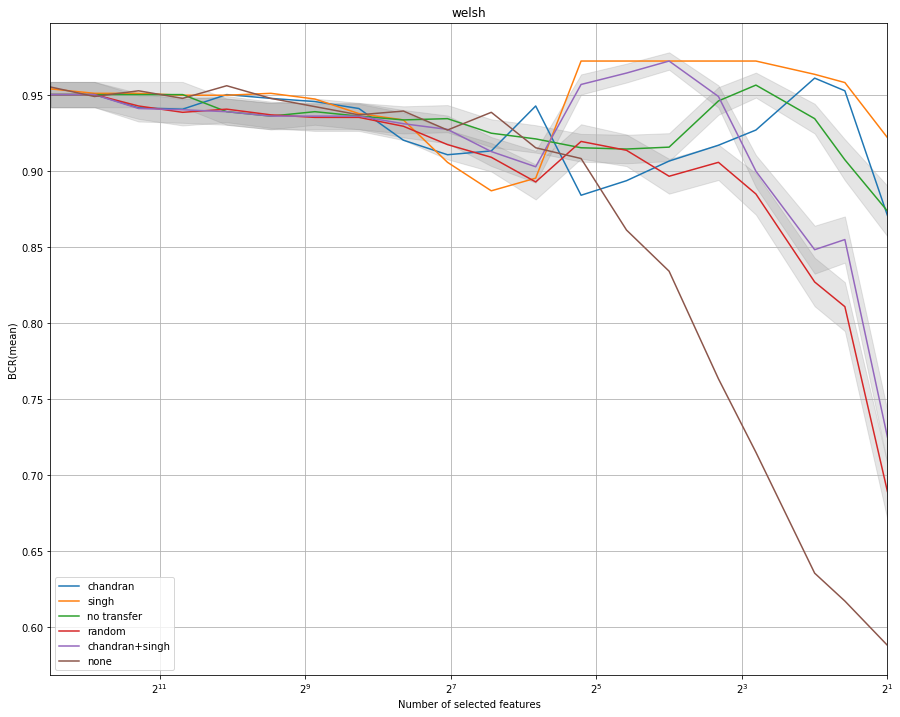

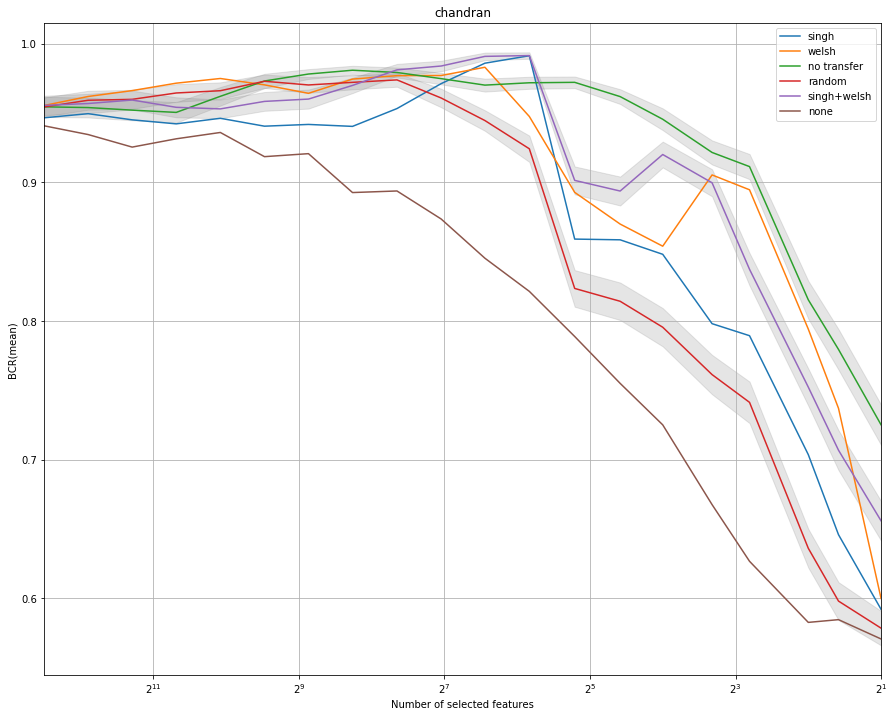

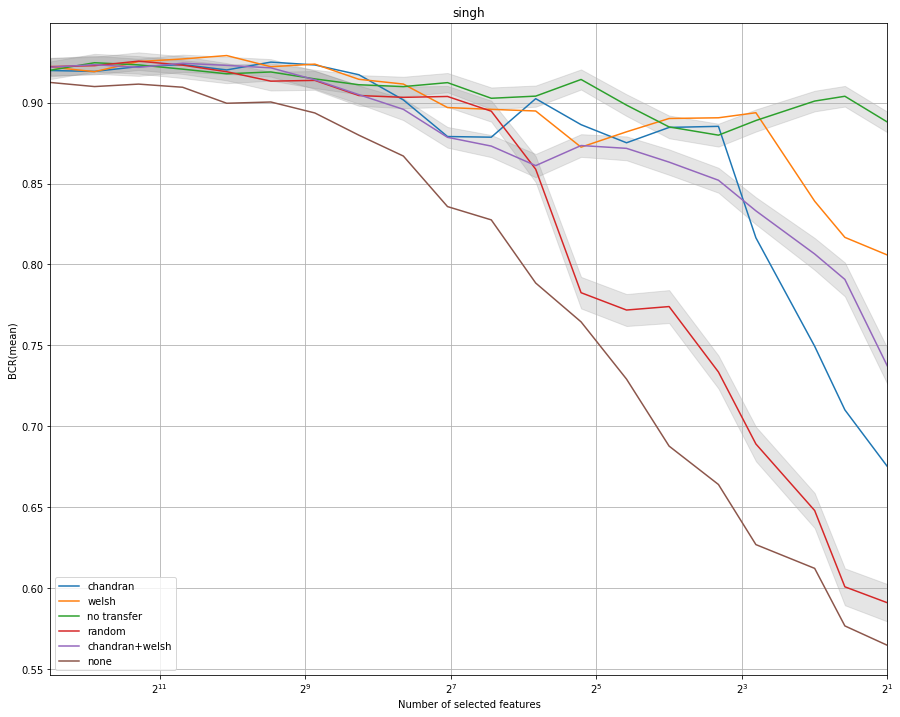

In [225]:
import matplotlib.pyplot as plt
%matplotlib inline

idx_target = 0
df_bcr_mean = pd.DataFrame(df_bcr.groupby(['target', 'source', 'num features'])['BCR'].mean()).reset_index()
df_bcr_sem = pd.DataFrame(df_bcr.groupby(['target', 'source', 'num features'])['BCR'].sem()).reset_index()
for idx_target in [2,0,1]:
    target = SAMPLE_NAMES[idx_target]
    df_target = df_bcr_mean.loc[df_bcr_mean['target'] == target]
    df_target_sem = df_bcr_sem.loc[df_bcr_sem['target'] == target]
    plt.figure(figsize=(15,12))
    plt.xscale('log', basex=2)
    for idx_source in [0,1,2,3,4, DUAL_TRANSFER_IDX + idx_target, 8]:
        #if idx_source in FILTER_SOURCES and idx_source!= idx_target:
        if idx_source!= idx_target:
            label = SAMPLE_NAMES[idx_source]
            df_source = df_target[df_target['source'] == label]
            plt.xlim(max(df_source['num features']), min(df_source['num features']))
            plt.plot(df_source['num features'], df_source['BCR'], label=label)
        # Plot sem interval
        if idx_source in [DUAL_TRANSFER_IDX + idx_target, 3, RANDOM_IDX]:
            df_source_sem = df_target_sem[df_target_sem['source'] == label]
            plt.fill_between(df_source['num features'], df_source['BCR'] - df_source_sem['BCR'], 
                             df_source['BCR'] + df_source_sem['BCR'], color='gray', alpha=0.2)
    plt.title(target)
    plt.xlabel("Number of selected features")
    #plt.xlim(100,400)
    #plt.xticks(df_source['num features'])
    plt.ylabel("BCR(mean)")
    plt.legend(loc = "best")
    plt.grid()
    plt.show()

### Plot BCR (standard error)

Standard error is relatively high and could weaken in a high amount the conclusions ot this statistical experiment. It's necessary to increase the iteration number to see if we can reduce this metric.

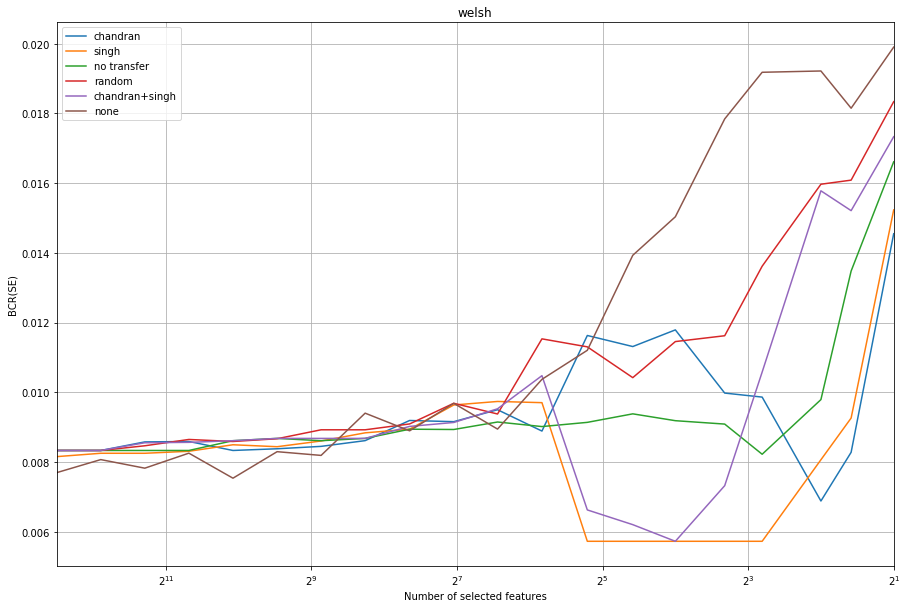

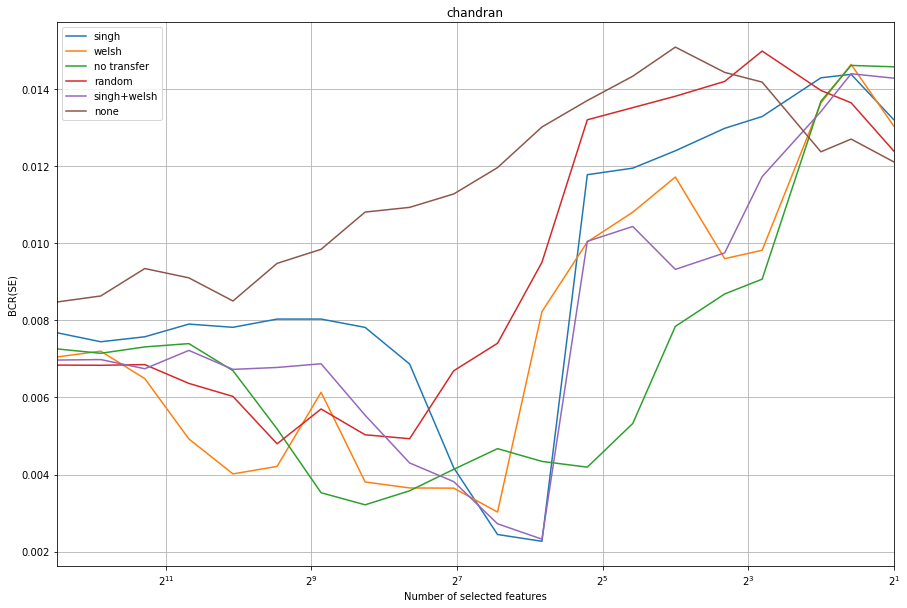

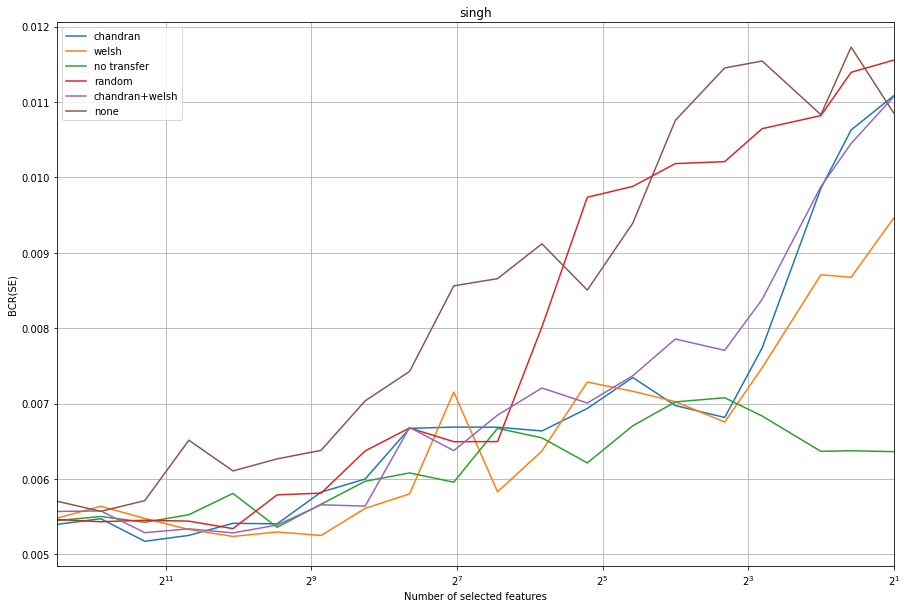

In [223]:
idx_target = 0
df_bcr_sem = pd.DataFrame(df_bcr.groupby(['target', 'source', 'num features'])['BCR'].sem()).reset_index()
for idx_target in [2,0,1]:
    target = SAMPLE_NAMES[idx_target]
    df_target = df_bcr_sem.loc[df_bcr_sem['target'] == target]
    plt.figure(figsize=(15,10))
    plt.xscale('log', basex=2)
    for idx_source in [0,1,2,3,4, DUAL_TRANSFER_IDX + idx_target, 8]:
        #if idx_source in FILTER_SOURCES and idx_source!= idx_target:
        if idx_source!= idx_target:
            label = SAMPLE_NAMES[idx_source]
            df_source = df_target[df_target['source'] == label]
            plt.xlim(max(df_source['num features']), min(df_source['num features']))
            plt.plot(df_source['num features'], df_source['BCR'], label=label)

    plt.title(target)
    plt.xlabel("Number of selected features")
    #plt.xlim(100,400)
    #plt.xticks(df_source['num features'])
    plt.ylabel("BCR(SE)")
    plt.legend(loc = "best")
    plt.grid()
    plt.show()

### Calculate stability

In [200]:
stability = []
for idx_target in FILTER_TARGETS:
    target = SAMPLE_NAMES[idx_target]
    df_target = df_bcr.loc[df_bcr['target'] == target]
    for idx_source in [0,1,2,3,4, DUAL_TRANSFER_IDX + idx_target, 8]:
        if idx_source!= idx_target:
            source = SAMPLE_NAMES[idx_source]
            df_source = df_target[df_target['source'] == source]
            n_features = np.unique(df_source['num features'])
            #print(n_features)
            for num_features in n_features:
                df_num_features = df_source[df_source['num features'] == num_features]
                # Calculate stability
                s = num_features
                s2 = s**2
                n = 12600
                s2_n = s2/n
                den = s - s2_n
                list_S = list(df_num_features['S'])
                stab = 0
                count = 0
                k = len(list_S)
                for i in range(k):
                    for j in range(i+1, k):
                        Si_Sj = np.intersect1d(list_S[i], list_S[j])
                        stab += (len(Si_Sj) - s2_n) / den
                        count += 1
                stability.append([target, source, num_features, stab/count])
                #print(1/count, 2/(k*(k-1)), stability[-1], 2*stab/(k*(k-1)))
                
df_stab = pd.DataFrame(stability, columns=['target', 'source', 'num features', 'stability'])
df_stab.head()


,target,source,num features,stability
0,chandran,singh,2,0.334769
1,chandran,singh,3,0.369247
2,chandran,singh,4,0.456360
3,chandran,singh,7,0.590038
4,chandran,singh,10,0.726602


### Plot stability

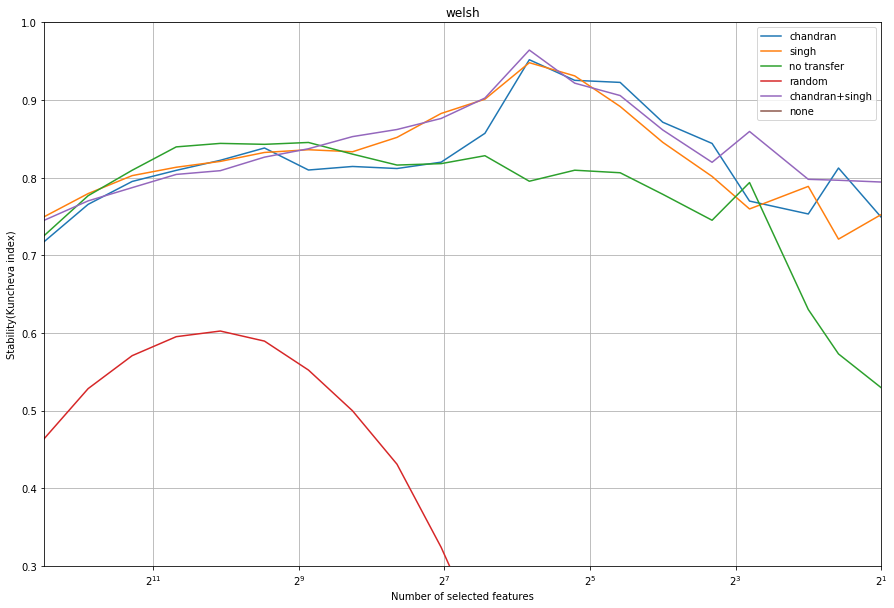

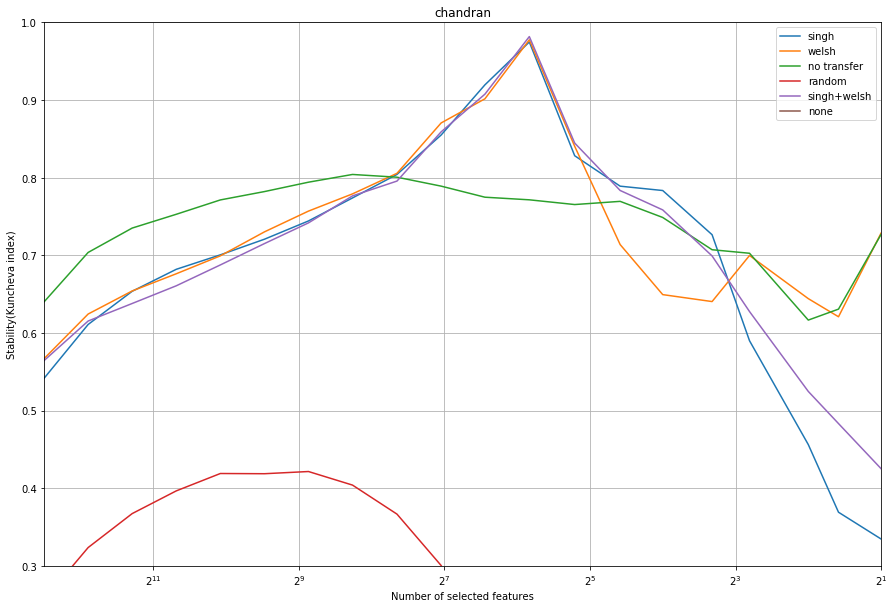

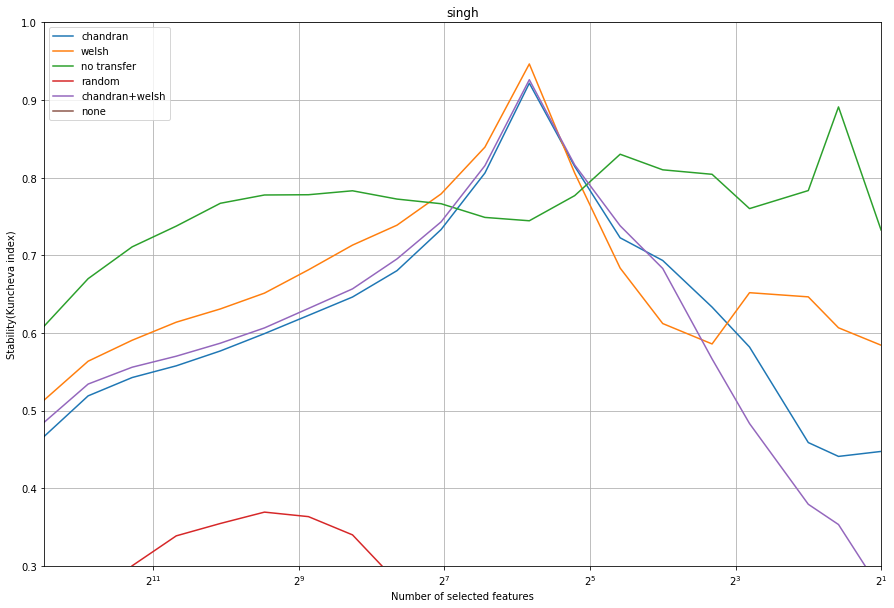

In [226]:
idx_target = 0
for idx_target in [2,0,1]:
    target = SAMPLE_NAMES[idx_target]
    df_target = df_stab.loc[df_stab['target'] == target]
    plt.figure(figsize=(15,10))
    plt.xscale('log', basex=2)
    for idx_source in [0,1,2,3,4, DUAL_TRANSFER_IDX + idx_target, 8]:
        #if idx_source in FILTER_SOURCES and idx_source!= idx_target:
        if idx_source!= idx_target:
            label = SAMPLE_NAMES[idx_source]
            df_source = df_target[df_target['source'] == label]
            plt.xlim(max(df_source['num features']), min(df_source['num features']))
            plt.plot(df_source['num features'], df_source['stability'], label=label)

    plt.title(target)
    plt.xlabel("Number of selected features")
    plt.ylim(0.3, 1)
    #plt.xticks(df_source['num features'])
    plt.ylabel("Stability(Kuncheva index)")
    plt.legend(loc = "best")
    plt.grid()
    plt.show()

### Impact of B

#### BCR

In [ ]:
FILTER_TARGETS = [2] #welsh
#features_to_select = np.unique(np.logspace(2, 12.5, num=50, endpoint=True, base=2.0, dtype=int))
bcr_list = []
B_values = [1,2,5,10,100,1000]
for g_B in B_values:
    for g_k in range(0,200):
        for idx_target in FILTER_TARGETS:
            #print("TARGET", SAMPLE_NAMES[idx_target])
            X_train_scaled_target, X_test_scaled_target, y_train_target, y_test_target =\
            get_target_data_sets(df_samples_norm, idx_target)
            for idx_source in [DUAL_TRANSFER_IDX + idx_target]:
                print("k", g_k, "TARGET", SAMPLE_NAMES[idx_target], "SOURCE", SAMPLE_NAMES[idx_source])
                for features_selected in features_to_select:
                    #print("Features",features_selected)
                    bcr, ranking_selected = compute_transfer(X_train_scaled_target, X_test_scaled_target, y_train_target, y_test_target,\
                                           idx_source=idx_source, num_features_selected=features_selected)
                    bcr_list.append([g_B, features_selected, bcr, ranking_selected])
                    if VERBOSE: print("Target", idx_target, "Source", idx_source, "#Features",\
                                      features_selected, "BCR", bcr)

df_bcr_B = pd.DataFrame(bcr_list, columns=['B', 'num features', 'BCR', 'S'])
df_bcr_B.head()

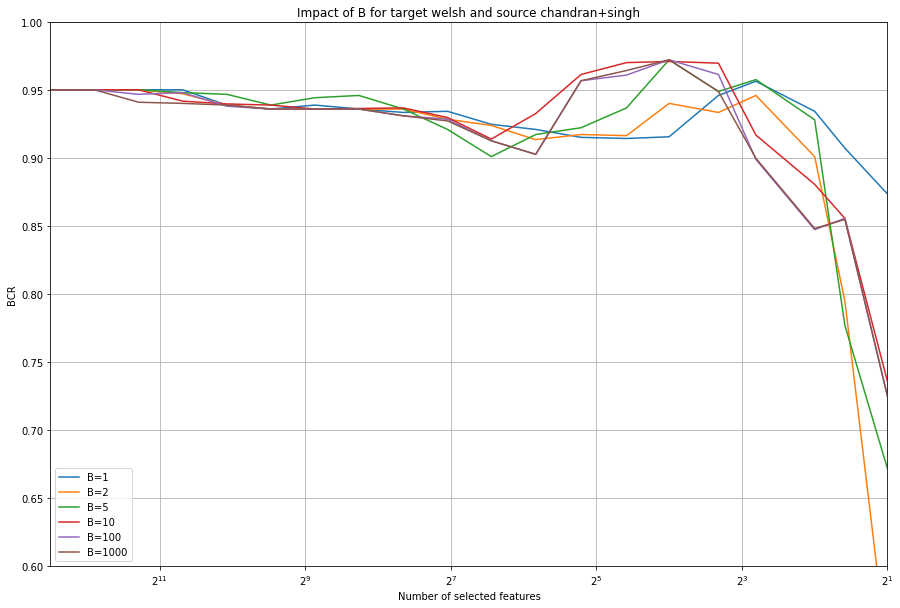

In [233]:
idx_target = 2
df_bcr_mean = pd.DataFrame(df_bcr_B.groupby(['B', 'num features'])['BCR'].mean()).reset_index()

target = SAMPLE_NAMES[2]
source = SAMPLE_NAMES[DUAL_TRANSFER_IDX + idx_target]
plt.figure(figsize=(15,10))
plt.xscale('log', basex=2)
for idx_B in B_values:
    df_B = df_bcr_mean.loc[df_bcr_mean['B'] == idx_B]
    plt.xlim(max(df_B['num features']), min(df_B['num features']))
    plt.plot(df_B['num features'], df_B['BCR'], label='B=' + str(idx_B))
plt.title("Impact of B for target " + target + " and source " + source)
plt.xlabel("Number of selected features")
#plt.xlim(100,400)
#plt.xticks(df_source['num features'])
plt.ylim(0.6, 1.0)
plt.ylabel("BCR")
plt.legend(loc = "best")
plt.grid()
plt.show()

#### Stability

In [229]:
stability = []
for idx_B in B_values:
    df_B = df_bcr_B.loc[df_bcr_B['B'] == idx_B]
    n_features = np.unique(df_bcr['num features'])
    #print(n_features)
    for num_features in n_features:
        df_num_features = df_B[df_B['num features'] == num_features]
        # Calculate stability
        s = num_features
        s2 = s**2
        n = 12600
        s2_n = s2/n
        den = s - s2_n
        list_S = list(df_num_features['S'])
        stab = 0
        count = 0
        k = len(list_S)
        for i in range(k):
            for j in range(i+1, k):
                Si_Sj = np.intersect1d(list_S[i], list_S[j])
                stab += (len(Si_Sj) - s2_n) / den
                count += 1
        stability.append([idx_B, num_features, stab/count])
        #print(1/count, 2/(k*(k-1)), stability[-1], 2*stab/(k*(k-1)))
                
df_stab_B = pd.DataFrame(stability, columns=['B', 'num features', 'stability'])
df_stab_B.head()


,B,num features,stability
0,1,2,0.529699
1,1,3,0.573081
2,1,4,0.630297
3,1,7,0.793791
4,1,10,0.745220


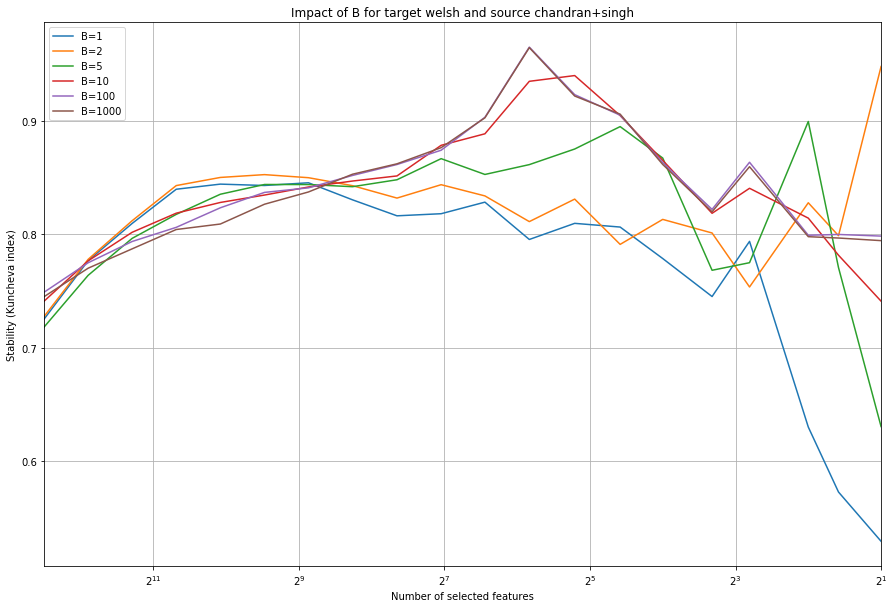

In [230]:
target = SAMPLE_NAMES[idx_target]
source = SAMPLE_NAMES[DUAL_TRANSFER_IDX + idx_target]
plt.figure(figsize=(15,10))
plt.xscale('log', basex=2)
for idx_B in B_values:
    df_B = df_stab_B.loc[df_stab_B['B'] == idx_B]
    plt.xlim(max(df_B['num features']), min(df_B['num features']))
    plt.plot(df_B['num features'], df_B['stability'], label='B=' + str(idx_B))
plt.title("Impact of B for target " + target + " and source " + source)
plt.xlabel("Number of selected features")
#plt.xlim(100,400)
#plt.xticks(df_source['num features'])
plt.ylabel("Stability (Kuncheva index)")
plt.legend(loc = "best")
plt.grid()
plt.show()

# Tools

## Backups

In [231]:
import pickle

copy = "final"
binary_file = open('df_bcr_' + copy + '.bin',mode='wb')
pickle.dump(df_bcr, binary_file)
binary_file.close()

binary_file = open('df_bcr_B_' + copy + '.bin',mode='wb')
pickle.dump(df_bcr_B, binary_file)
binary_file.close()

binary_file = open('df_stab_' + copy + '.bin',mode='wb')
pickle.dump(df_stab, binary_file)
binary_file.close()

binary_file = open('df_stab_B_' + copy + '.bin',mode='wb')
pickle.dump(df_stab_B, binary_file)
binary_file.close()

## Restores

In [ ]:
copy = "0"
binary_file = open('df_bcr_' + copy + '.bin',mode='rb')
df_bcr = pickle.load(binary_file)
binary_file.close()

binary_file = open('df_bcr_B_' + copy + '.bin',mode='rb')
df_bcr_B = pickle.load(binary_file)
binary_file.close()

binary_file = open('df_stab_' + copy + '.bin',mode='rb')
df_stab = pickle.load(binary_file)
binary_file.close()

binary_file = open('df_stab_B_' + copy + '.bin',mode='rb')
df_stab_B = pickle.load(binary_file)
binary_file.close()

# Outputs

In [234]:
%%bash
jupyter nbconvert --to=latex --template=~/report.tplx feature_selection_linear_models.ipynb 1>/dev/null 2>/dev/null
/Library/TeX/texbin/pdflatex -shell-escape feature_selection_linear_models 1>/dev/null 2>/dev/null
jupyter nbconvert --to html_with_toclenvs feature_selection_linear_models.ipynb 1>/dev/null 2>/dev/null